In [57]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import utils

In [42]:
cal_path = "camera_cal"
objpoints = []
imgpoints = []
pattern_shape = (9, 6)
obj_point = np.zeros(((pattern_shape[0]*pattern_shape[1]), 3), np.float32)
obj_point[:, :2] = np.mgrid[0 : pattern_shape[0], 0 : pattern_shape[1]].T.reshape(-1, 2)
for i in os.listdir(cal_path):
    img_path = os.path.join(cal_path, i)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, pattern_shape, None)
    if ret:
        objpoints.append(obj_point)
        imgpoints.append(corners)

In [58]:
img = cv2.imread('camera_cal/calibration3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
chess = utils.cal_undistort(img, mtx, dist )
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(chess)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\calib3d\src\calibration.cpp:3339: error: (-2:Unspecified error) in function 'void __cdecl cv::collectCalibrationData(const class cv::_InputArray &,const class cv::_InputArray &,const class cv::_InputArray &,int,class cv::Mat &,class cv::Mat &,class cv::Mat *,class cv::Mat &)'
>  (expected: 'nimages == (int)imagePoints1.total()'), where
>     'nimages' is 3
> must be equal to
>     '(int)imagePoints1.total()' is 1


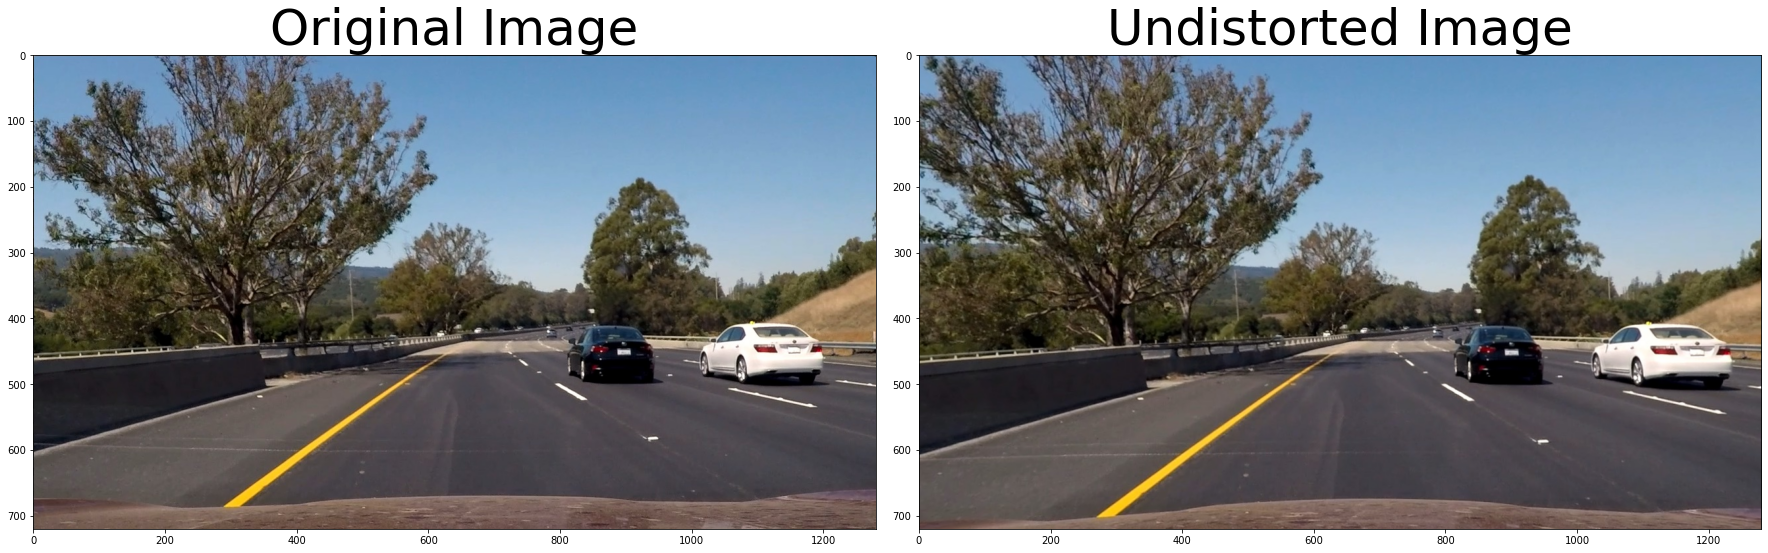

In [4]:
img = cv2.imread('test_images/test6.jpg')
chess = utils.cal_undistort(img, objpoints, imgpoints )
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(chess, cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

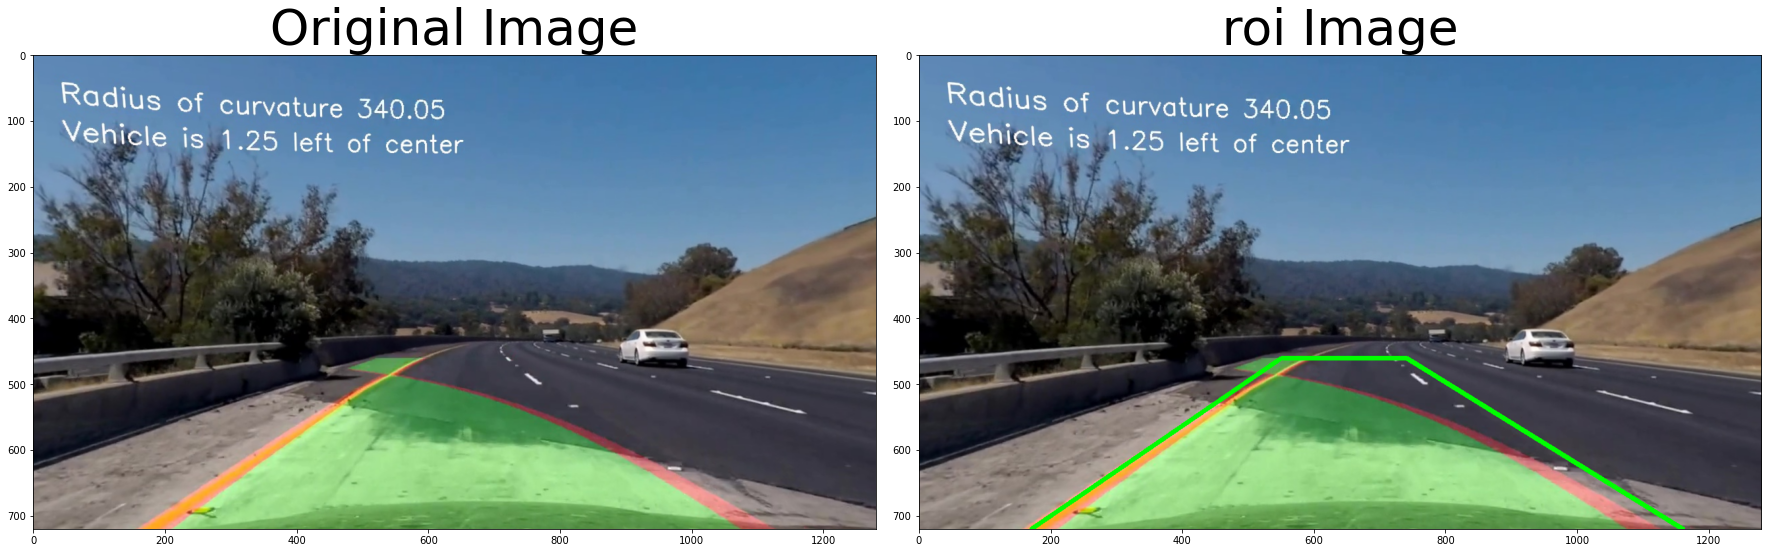

In [5]:
# image = mpimg.imread('test_images/straight_lines2.jpg') 
image = mpimg.imread('test_images/test16.jpg') 
image = utils.cal_undistort(image, objpoints, imgpoints)
vertices = np.array([[[170, image.shape[0]], [550, 460], [740, 460], [1160, image.shape[0]]]])
image_copy = image.copy()
utils.draw_line(image_copy, vertices[0])
# roi = region_of_interest(image, vertices)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(image_copy)
ax2.set_title('roi Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280) (720, 1280)
(array([  0,   0,   0, ..., 719, 719, 719], dtype=int64), array([ 443,  444,  445, ..., 1096, 1098, 1100], dtype=int64)) 0


Text(0.5, 1.0, 's Image')

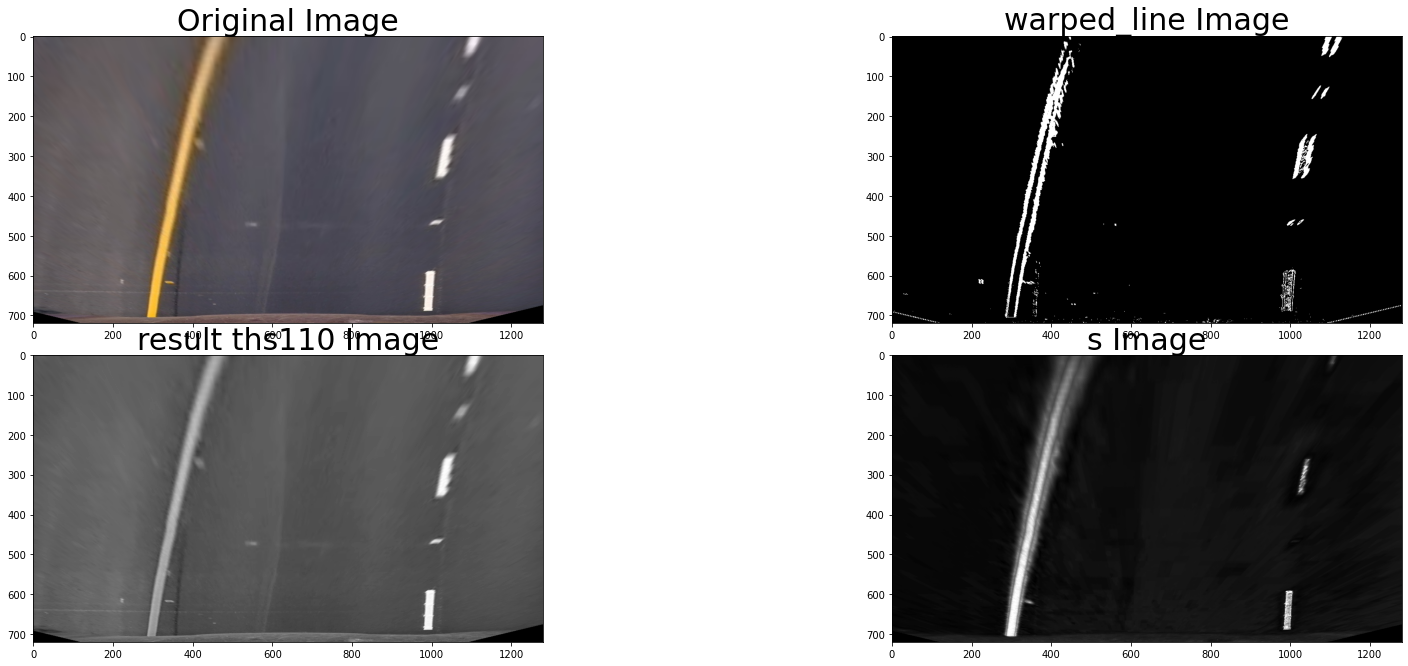

In [28]:

src = vertices[0].astype(np.float32)
dst = np.float32([[250, image.shape[0]], [120, 0], [1160, 0], [1000, image.shape[0]]])
res0 = utils.pipeline(image, color=False)/255
M = cv2.getPerspectiveTransform(src, dst)
# roi, mark = region_of_interest(image, vertices)
# masked_warped = cv2.warpPerspective(mark, M, mark.shape[1::-1], flags=cv2.INTER_LINEAR)
warped = cv2.warpPerspective(image, M, image.shape[1::-1], flags=cv2.INTER_LINEAR)
warped_pipe = utils.pipeline(warped, color=False)
# masked_warped = cv2.cvtColor(masked_warped, cv2.COLOR_RGB2GRAY).astype(np.float64)
# warped_line = cv2.bitwise_and(masked_warped,warped_pipe)
warped_line = warped_pipe
# warped_line[warped_line > 0] = 1
print(warped_line.shape, warped_pipe.shape)

hls = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS)
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
f, (ax) = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
print(warped_line.nonzero(), warped_line[0, 867])
ax[0, 0].imshow(warped, cmap="gray")
ax[0, 0].set_title('Original Image', fontsize=30)
ax[0, 1].imshow(warped_line, cmap="gray")
ax[0, 1].set_title('warped_line Image', fontsize=30)

ax[1, 0].imshow(l_channel, cmap="gray")
ax[1, 0].set_title('result ths110 Image', fontsize=30)
ax[1, 1].imshow(s_channel, cmap="gray")
ax[1, 1].set_title('s Image', fontsize=30)
# plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

[ 3.72492295e-04 -2.55562292e-01  3.24038014e+02] [ 6.37249691e-05 -2.35903186e-01  1.05065696e+03]


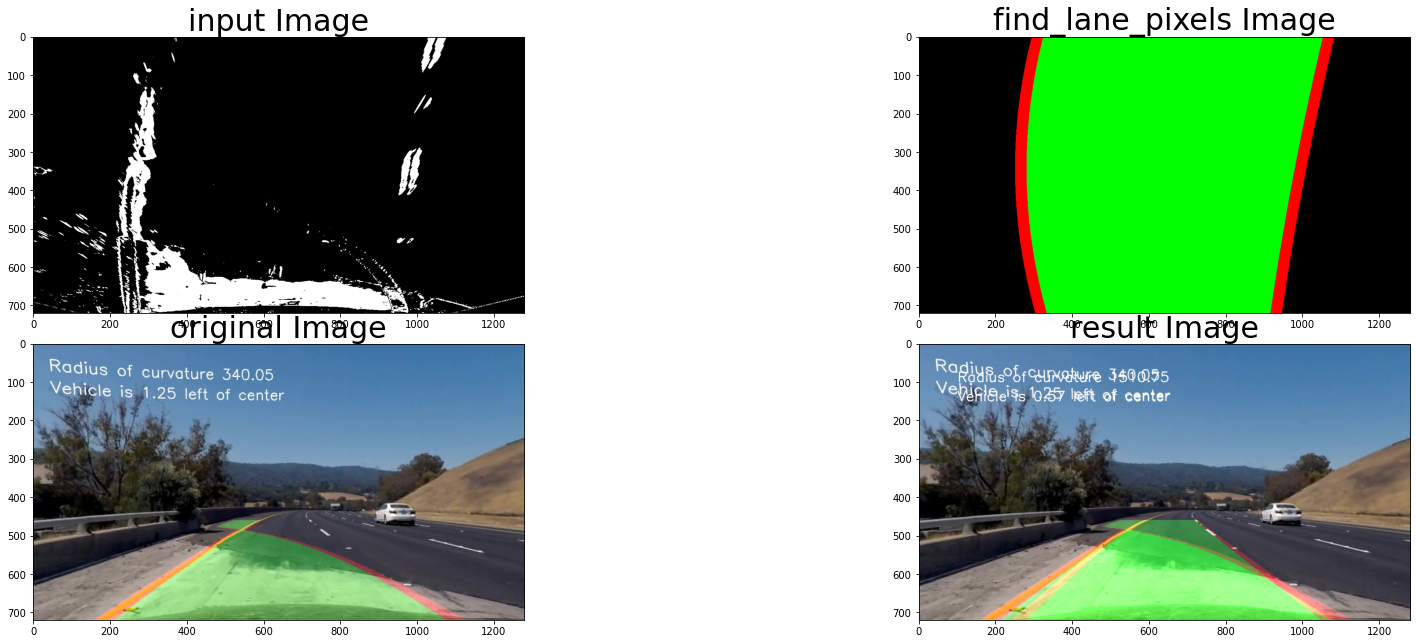

In [9]:
out_img0, left_fitx, right_fitx, curve, center_off = utils.find_lane_pixels(warped_line)
print(left_fitx, right_fitx)
text0 = "Radius of curvature {curve:5.2f}".format(curve=curve)
text1 = "Vehicle is {off:.2f} {direc} of center".format(off=np.absolute(center_off), direc = "right" if center_off>0 else "left")

M = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(out_img0, M, out_img0.shape[1::-1], flags=cv2.INTER_LINEAR)
result = cv2.addWeighted(image, 1, warped.astype(np.uint8), 0.3, 0)
cv2.putText(result, text0, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2)
cv2.putText(result, text1, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2)
f, (ax) = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
ax[0, 0].imshow(warped_line, cmap="gray")
ax[0, 0].set_title('input Image', fontsize=30)
ax[0, 1].imshow(out_img0, cmap="gray")
ax[0, 1].set_title('find_lane_pixels Image', fontsize=30)

ax[1, 0].imshow(image, cmap="gray")
ax[1, 0].set_title('original Image', fontsize=30)
ax[1, 1].imshow(result, cmap="gray")
ax[1, 1].set_title('result Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [24]:
def process_image(image): n
    image = utils.cal_undistort(image, objpoints, imgpoints)
    vertices = np.array([[[170, image.shape[0]], [550, 460], [740, 460], [1160, image.shape[0]]]])
    src = vertices[0].astype(np.float32)
    dst = np.float32([[250, image.shape[0]], [120, 0], [1160, 0], [1000, image.shape[0]]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(image, M, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    warped_pipe = utils.pipeline(warped, color=False)
    out_img0, left_fitx, right_fitx, curve, center_off = utils.find_lane_pixels(warped_pipe)
    text0 = "Radius of curvature {curve:5.2f}".format(curve=curve)
    text1 = "Vehicle is {off:.2f} {direc} of center".format(off=np.absolute(center_off), direc = "right" if center_off>0 else "left")
    M = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(out_img0, M, out_img0.shape[1::-1], flags=cv2.INTER_LINEAR)
    result = cv2.addWeighted(image, 1, warped.astype(np.uint8), 0.3, 0)
    cv2.putText(result, text0, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2)
    cv2.putText(result, text1, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,255), 2)
    return result

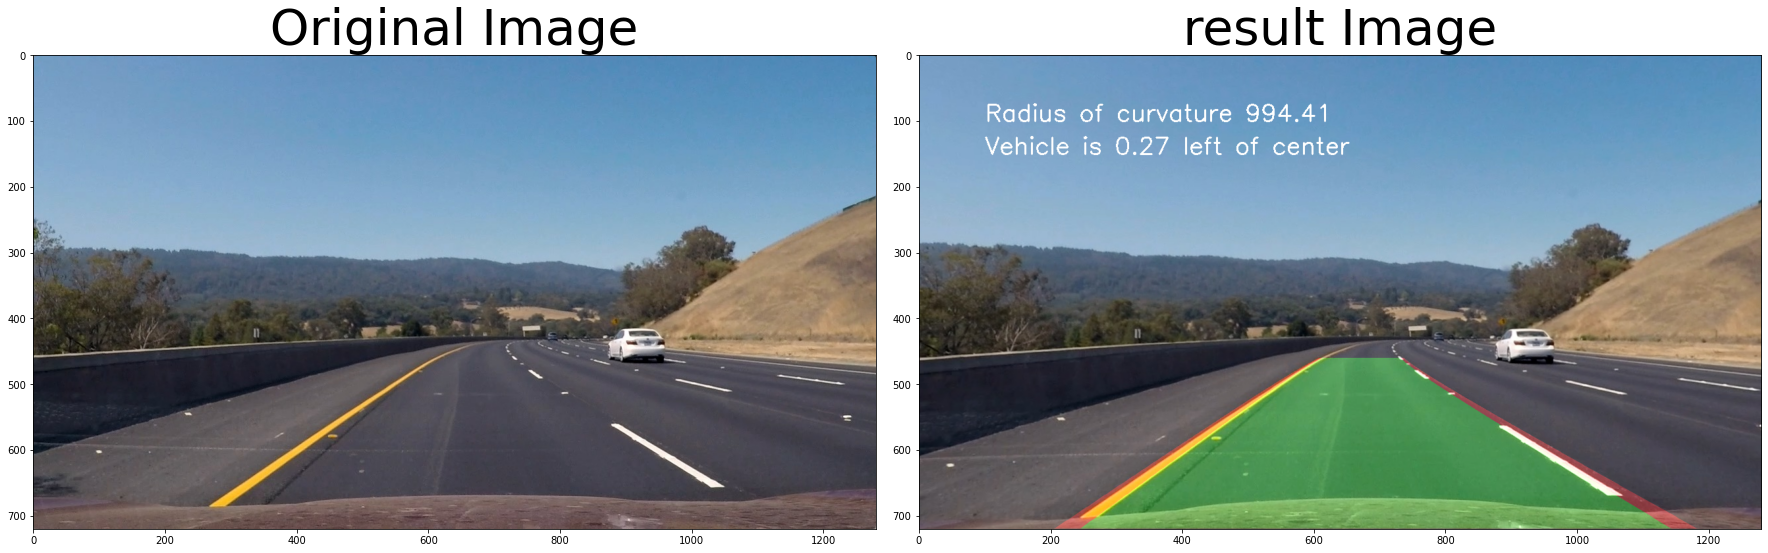

In [25]:
image = mpimg.imread('test_images/test3.jpg') 
result = process_image(image)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(result)
ax2.set_title('result Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [26]:
video_output = 'test_videos_output/project_video14.mp4'
clip1 = VideoFileClip("project_video.mp4")
# clip1 = VideoFileClip('project_video.mp4').subclip(0,5)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(video_output, audio=False)

Moviepy - Building video test_videos_output/project_video14.mp4.
Moviepy - Writing video test_videos_output/project_video14.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/project_video14.mp4
Wall time: 17min 55s
